In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import scipy.stats as sci
import statistics as stt
import seaborn as sns
import pandas as pd
import numpy as np
import joypy
import csv

In [2]:
d_staticQ = {}
d_dynamicQ = {}
num_simulations=50
for i in range(num_simulations):
    csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/dynamicEnv_new/staticQ/noPlasticity_normalAtt/' + str(i+1) + '.csv'
    d_staticQ["data{0}".format(i)] = pd.read_csv(csv_filename)
    
    csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/dynamicEnv_new/dynamicQ/noPlasticity_normalAtt/' + str(i+1) + '.csv'
    d_dynamicQ["data{0}".format(i)] = pd.read_csv(csv_filename)

In [3]:
simulations = len(d_staticQ)
timesteps = d_staticQ['data0'].shape[0]

print('Number of simulations = ' + str(simulations))
print('Number of columns = ' + str(d_staticQ['data0'].shape[1]))
print('Number of timesteps = ' + str(timesteps))
print('Column names = ' + str(d_staticQ['data0'].columns))

Number of simulations = 50
Number of columns = 12
Number of timesteps = 100000
Column names = Index(['Xposition', 'Yposition', 'aVtemperature', 'aVthirst', 'DriveTemp',
       'DriveThirst', 'TFtemperature', 'TFthirst', 'attractorQ', 'Grad_Temp',
       'we_temp', 'we_thirst'],
      dtype='object')


In [4]:
periods = 5
period_len = d_staticQ['data0'].shape[0]/5
period_limits = []
for i in range(periods+1):
    period_limits.append(int(period_len*i))
period_limits

[0, 20000, 40000, 60000, 80000, 100000]

# Comparison of aVs (timeslots of 100 timesteps) between fixed and dynamic Q conditions

In [5]:
mean_slot = 100
aVTempMean_fixQ = []
aVTempVar_fixQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d_staticQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVTempMean_fixQ.append(stt.mean(SlotMean))
    aVTempVar_fixQ.append(stt.variance(SlotMean))
    
aVThirstMean_fixQ = []
aVThirstVar_fixQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d_staticQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVThirstMean_fixQ.append(stt.mean(SlotMean))
    aVThirstVar_fixQ.append(stt.variance(SlotMean))
    
GradTempMean_fixQ = []
for i in range(int(timesteps/mean_slot)):
    GradTempMean_fixQ.append(stt.mean(d_staticQ[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

100


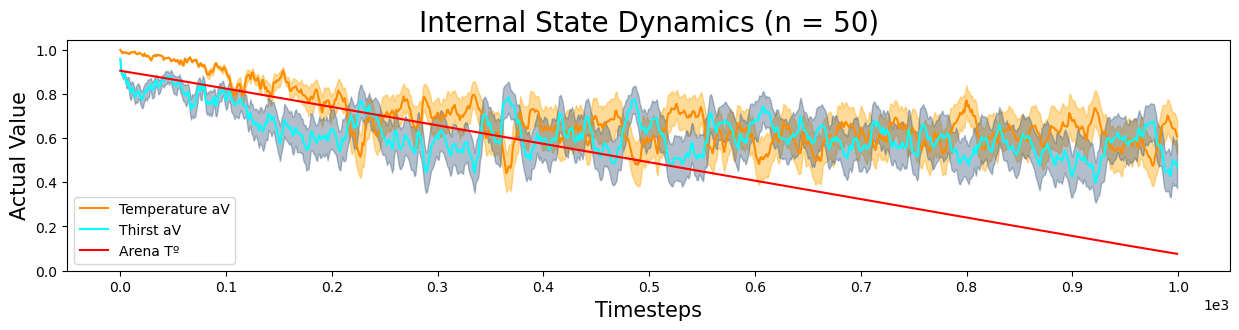

In [6]:
print(mean_slot)
fig = plt.figure(figsize=(15, 3))
plt.plot(aVTempMean_fixQ, label='Temperature aV', color="darkorange")
x = list(range(0, round(timesteps/mean_slot)))
plt.fill_between(np.array(x), np.array(aVTempMean_fixQ) - np.array([x / 2 for x in aVTempVar_fixQ]), np.array(aVTempMean_fixQ) + np.array([x / 2 for x in aVTempVar_fixQ]), color="orange", alpha=0.4) 
plt.plot(aVThirstMean_fixQ, label='Thirst aV', color="cyan")
plt.fill_between(np.array(x), np.array(aVThirstMean_fixQ) - np.array([x / 2 for x in aVThirstVar_fixQ]), np.array(aVThirstMean_fixQ) + np.array([x / 2 for x in aVThirstVar_fixQ]), color="#3F5D7D", alpha=0.4) 
plt.plot(GradTempMean_fixQ, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/(mean_slot*10)))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Internal State Dynamics (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In [7]:
aVTempMean_dycQ = []
aVTempVar_dycQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d_dynamicQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVTempMean_dycQ.append(stt.mean(SlotMean))
    aVTempVar_dycQ.append(stt.variance(SlotMean))
    
aVThirstMean_dycQ = []
aVThirstVar_dycQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d_dynamicQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVThirstMean_dycQ.append(stt.mean(SlotMean))
    aVThirstVar_dycQ.append(stt.variance(SlotMean))
    
GradTempMean_dycQ = []
for i in range(int(timesteps/mean_slot)):
    GradTempMean_dycQ.append(stt.mean(d_dynamicQ[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

100


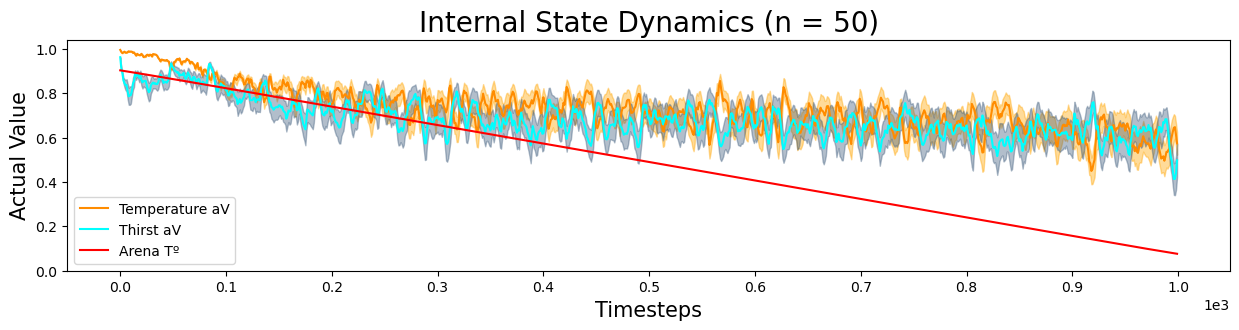

In [8]:
print(mean_slot)
fig = plt.figure(figsize=(15, 3))
plt.plot(aVTempMean_dycQ, label='Temperature aV', color="darkorange")
x = list(range(0, round(timesteps/mean_slot)))
plt.fill_between(np.array(x), np.array(aVTempMean_dycQ) - np.array([x / 2 for x in aVTempVar_dycQ]), np.array(aVTempMean_dycQ) + np.array([x / 2 for x in aVTempVar_dycQ]), color="orange", alpha=0.4) 
plt.plot(aVThirstMean_dycQ, label='Thirst aV', color="cyan")
plt.fill_between(np.array(x), np.array(aVThirstMean_dycQ) - np.array([x / 2 for x in aVThirstVar_dycQ]), np.array(aVThirstMean_dycQ) + np.array([x / 2 for x in aVThirstVar_dycQ]), color="#3F5D7D", alpha=0.4) 
plt.plot(GradTempMean_dycQ, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/(mean_slot*10)))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Internal State Dynamics (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

100


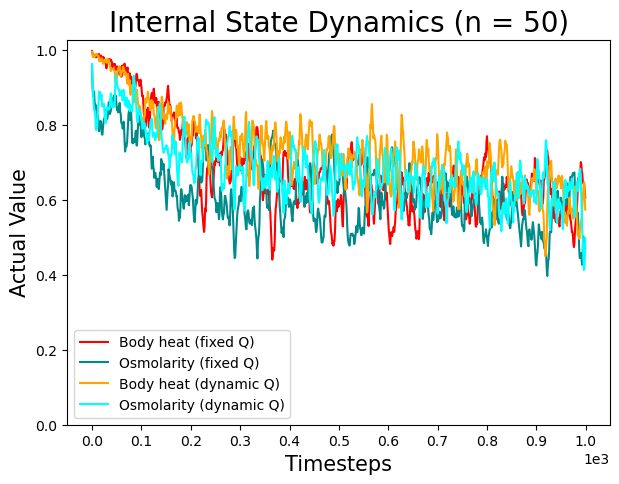

In [9]:
print(mean_slot)
fig = plt.figure(figsize=(7, 5))
plt.plot(aVTempMean_fixQ, label='Body heat (fixed Q)', color="red")
plt.plot(aVThirstMean_fixQ, label='Osmolarity (fixed Q)', color="darkcyan")

plt.plot(aVTempMean_dycQ, label='Body heat (dynamic Q)', color="orange")
plt.plot(aVThirstMean_dycQ, label='Osmolarity (dynamic Q)', color="cyan")


plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/(mean_slot*10)))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Internal State Dynamics (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In [10]:
if sci.normaltest(aVTempMean_fixQ)[1] < 0.05: print("aVTempMean_fixQ is Non-normal distributed")
if sci.normaltest(aVTempMean_dycQ)[1] < 0.05: print("aVTempMean_dycQ is Non-normal distributed")
if sci.normaltest(aVThirstMean_fixQ)[1] < 0.05: print("aVThirstMean_fixQ is Non-normal distributed")
if sci.normaltest(aVThirstMean_dycQ)[1] < 0.05: print("aVThirstMean_dycQ is Non-normal distributed")

if sci.wilcoxon(aVTempMean_fixQ, aVTempMean_dycQ)[1] < 0.05: print("Difference in Body Heat = " + str(sci.wilcoxon(aVTempMean_fixQ, aVTempMean_dycQ)[1]))
if sci.wilcoxon(aVThirstMean_fixQ, aVThirstMean_dycQ)[1] < 0.05: print("Difference in Osmolarity = " + str(sci.wilcoxon(aVThirstMean_fixQ, aVThirstMean_dycQ)[1]))

aVTempMean_fixQ is Non-normal distributed
aVTempMean_dycQ is Non-normal distributed
aVThirstMean_fixQ is Non-normal distributed
aVThirstMean_dycQ is Non-normal distributed
Difference in Body Heat = 4.193282016585674e-55
Difference in Osmolarity = 3.3591510507121986e-94


In [11]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    #ax.set_yticks(np.arange(0, 1.1, step=0.2))
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [12]:
count = 0
data = [aVTempMean_fixQ, aVTempMean_dycQ, aVThirstMean_fixQ, aVThirstMean_dycQ]

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

parts = ax.violinplot(
        data, widths = 0.5, showmeans = False, showextrema = True, showmedians = False)

for partname in ('cbars','cmins','cmaxes'):
    vp = parts[partname]
    vp.set_edgecolor('black')
    vp.set_alpha(0.4)
    vp.set_linewidth(2)

for pc in parts['bodies']:
    count += 1
    if count > 2:
        pc.set_facecolor('cyan')
        pc.set_alpha(0.5)
    else:
        pc.set_facecolor('orange')
        pc.set_alpha(0.8)


ax.vlines(inds, quartile1, quartile3, color='darkblue', linestyle='-', lw=10)
ax.scatter(inds, medians, marker='_', color='white', s=80, zorder=3, alpha=1)
    

custom_lines = [Line2D([0], [1], color='orange', lw=5, alpha = 0.8),
                Line2D([0], [0], color='cyan', lw=5, alpha = 0.5)]
ax.legend(custom_lines, ['Body Heat', 'Osmolarity'], fontsize=13, loc=4)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Internal State aV Distribution', fontsize=18, pad=10)
plt.xlabel('Conditions', fontsize=15)

labels = ['Static', 'Dynamic', 'Static', 'Dynamic']
set_axis_style(ax, labels)


plt.show()

# Stability and disparity

In [13]:
fulfilment_fixQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d_staticQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d_staticQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    fulfilment_fixQ.append((stt.mean(SlotMeanTemp)+stt.mean(SlotMeanThirst))/2)

    
disparity_fixQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d_staticQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d_staticQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    disparity_fixQ.append(1-(abs(stt.mean(SlotMeanTemp)-stt.mean(SlotMeanThirst))))
    
    
stability_fixQ = []
    
aVs_timestep_fixQ = []
dVs_timestep_fixQ = []

for i in range(len(d_staticQ[dict_name]['aVtemperature'])):
    current_timestep = []
    current_timestep.append(d_staticQ[dict_name]['aVtemperature'][i])
    current_timestep.append(d_staticQ[dict_name]['aVthirst'][i])
    aVs_timestep_fixQ.append(current_timestep)
    dVs_timestep_fixQ.append([1, 1])
    
for i in range(int(timesteps/mean_slot)):
    stability_fixQ.append(1-np.mean(np.array(dVs_timestep_fixQ[mean_slot*i:mean_slot*(i+1)])-np.array(aVs_timestep_fixQ[mean_slot*i:mean_slot*(i+1)])**2))

In [14]:
fulfilment_dycQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d_dynamicQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d_dynamicQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    fulfilment_dycQ.append((stt.mean(SlotMeanTemp)+stt.mean(SlotMeanThirst))/2)

    
disparity_dycQ = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d_dynamicQ[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d_dynamicQ[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    disparity_dycQ.append(1-(abs(stt.mean(SlotMeanTemp)-stt.mean(SlotMeanThirst))))


stability_dycQ = []

aVs_timestep_dycQ = []
dVs_timestep_dycQ = []

for i in range(len(d_dynamicQ[dict_name]['aVtemperature'])):
    current_timestep = []
    current_timestep.append(d_dynamicQ[dict_name]['aVtemperature'][i])
    current_timestep.append(d_dynamicQ[dict_name]['aVthirst'][i])
    aVs_timestep_dycQ.append(current_timestep)
    dVs_timestep_dycQ.append([1, 1])
    
for i in range(int(timesteps/mean_slot)):
    stability_dycQ.append(1-np.mean(np.array(dVs_timestep_dycQ[mean_slot*i:mean_slot*(i+1)])-np.array(aVs_timestep_dycQ[mean_slot*i:mean_slot*(i+1)])**2))

In [15]:
if sci.normaltest(fulfilment_fixQ)[1] < 0.05: print("fulfilment_fixQ is Non-normal distributed")
if sci.normaltest(fulfilment_dycQ)[1] < 0.05: print("fulfilment_dycQ is Non-normal distributed")
if sci.normaltest(disparity_fixQ)[1] < 0.05: print("disparity_fixQ is Non-normal distributed")
if sci.normaltest(disparity_dycQ)[1] < 0.05: print("disparity_dycQ is Non-normal distributed")
if sci.normaltest(stability_fixQ)[1] < 0.05: print("stability_fixQ is Non-normal distributed")
if sci.normaltest(stability_dycQ)[1] < 0.05: print("stability_dycQ is Non-normal distributed")
    
if sci.wilcoxon(fulfilment_fixQ, fulfilment_dycQ)[1] < 0.05: print("Difference in Fulfilment = " + str(sci.wilcoxon(fulfilment_fixQ, fulfilment_dycQ)[1]))
if sci.wilcoxon(disparity_fixQ, disparity_dycQ)[1] < 0.05: print("Difference in Disparity = " + str(sci.wilcoxon(disparity_fixQ, disparity_dycQ)[1]))
if sci.wilcoxon(stability_fixQ, stability_dycQ)[1] < 0.05: print("Difference in Stability = " + str(sci.wilcoxon(stability_fixQ, stability_dycQ)[1]))

fulfilment_fixQ is Non-normal distributed
fulfilment_dycQ is Non-normal distributed
disparity_fixQ is Non-normal distributed
disparity_dycQ is Non-normal distributed
stability_fixQ is Non-normal distributed
stability_dycQ is Non-normal distributed
Difference in Fulfilment = 2.1359600557867446e-156
Difference in Disparity = 1.550120527508331e-29
Difference in Stability = 9.483981987888614e-05


In [16]:
count = 0
data = [fulfilment_fixQ, fulfilment_dycQ, disparity_fixQ, disparity_dycQ, stability_fixQ, stability_dycQ]

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

parts = ax.violinplot(
        data, widths = 0.5, showmeans = False, showextrema = True, showmedians = False)

for partname in ('cbars','cmins','cmaxes'):
    vp = parts[partname]
    vp.set_edgecolor('black')
    vp.set_alpha(0.4)
    vp.set_linewidth(2)

for pc in parts['bodies']:
    count += 1
    if count > 4:
        pc.set_facecolor('Red')
        pc.set_alpha(0.5)
    elif count > 2 and count < 5:
        pc.set_facecolor('#4d0082')
        pc.set_alpha(0.5)
    else:
        pc.set_facecolor('Green')
        pc.set_alpha(0.5)
        
ax.vlines(inds, quartile1, quartile3, color='darkblue', linestyle='-', lw=10)
ax.scatter(inds, medians, marker='_', color='white', s=80, zorder=3, alpha=1)

custom_lines = [Line2D([0], [1], color='Green', lw=5, alpha = 0.5),
                Line2D([0], [0], color='#4d0082', lw=5, alpha = 0.5),
                Line2D([1], [1], color='Red', lw=5, alpha = 0.5)]
ax.legend(custom_lines, ['Efficiency', 'Fairness', 'Stability'], fontsize=13, loc='lower center')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('SRR/PV static vs dynamic', fontsize=18, pad=10)
plt.xlabel('STT/PV Conditions', fontsize=15)

labels = ['Static', 'Dynamic', 'Static', 'Dynamic', 'Static', 'Dynamic']
set_axis_style(ax, labels)
    

plt.show()

# Attractor switches

In [17]:
switch_n_fixQ = 0
past_temperature = False
dominance_period = 100

for i in range(num_simulations):
    dict_name = 'data'+ str(i)
    TF_Temperature = d_staticQ[dict_name]['TFtemperature'].to_list()
    TF_Thirst = d_staticQ[dict_name]['TFthirst'].to_list()
    
    for j in range(len(TF_Temperature)-dominance_period):
        mean_10_temperature = 0
        mean_10_thirst = 0
        ten_temperature = 0
        ten_thirst = 0
        for k in range (dominance_period):
            ten_temperature += TF_Temperature[j+k]
            ten_thirst += TF_Thirst[j+k]
        mean_10_temperature = ten_temperature/10
        mean_10_thirst = ten_thirst/10

        if mean_10_temperature>mean_10_thirst and past_temperature == False:
            switch_n_fixQ+=1
            past_temperature = True
        if mean_10_temperature>mean_10_thirst and past_temperature == True:
            pass
        if mean_10_temperature<mean_10_thirst and past_temperature == True:
            switch_n_fixQ+=1
            past_temperature = False
        if mean_10_temperature<mean_10_thirst and past_temperature == False:
            pass

print('Number of switches in attractor = ' + str(switch_n_fixQ))
print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 3592
Considering periods of 100 episodes


In [18]:
switch_n_dycQ = 0
past_temperature = False
dominance_period = 100

for i in range(num_simulations):
    dict_name = 'data'+ str(i)
    TF_Temperature = d_dynamicQ[dict_name]['TFtemperature'].to_list()
    TF_Thirst = d_dynamicQ[dict_name]['TFthirst'].to_list()
    
    for j in range(len(TF_Temperature)-dominance_period):
        mean_10_temperature = 0
        mean_10_thirst = 0
        ten_temperature = 0
        ten_thirst = 0
        for k in range (dominance_period):
            ten_temperature += TF_Temperature[j+k]
            ten_thirst += TF_Thirst[j+k]
        mean_10_temperature = ten_temperature/10
        mean_10_thirst = ten_thirst/10

        if mean_10_temperature>mean_10_thirst and past_temperature == False:
            switch_n_dycQ+=1
            past_temperature = True
        if mean_10_temperature>mean_10_thirst and past_temperature == True:
            pass
        if mean_10_temperature<mean_10_thirst and past_temperature == True:
            switch_n_dycQ+=1
            past_temperature = False
        if mean_10_temperature<mean_10_thirst and past_temperature == False:
            pass

print('Number of switches in attractor = ' + str(switch_n_dycQ))
print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 7796
Considering periods of 100 episodes


In [19]:
fixQ_period_switches = []
dominance_period = 100

for a in range(5):
    switch_n = 0
    past_temperature = False

    for i in range(num_simulations):
        dict_name = 'data'+ str(i)
        TF_Temperature = d_staticQ[dict_name]['TFtemperature'][period_limits[a]:period_limits[a+1]].to_list()
        TF_Thirst = d_staticQ[dict_name]['TFthirst'][period_limits[a]:period_limits[a+1]].to_list()

        for j in range(len(TF_Temperature)-dominance_period):
            mean_10_temperature = 0
            mean_10_thirst = 0
            ten_temperature = 0
            ten_thirst = 0
            for k in range (dominance_period):
                ten_temperature += TF_Temperature[j+k]
                ten_thirst += TF_Thirst[j+k]
            mean_10_temperature = ten_temperature/10
            mean_10_thirst = ten_thirst/10

            if mean_10_temperature>mean_10_thirst and past_temperature == False:
                switch_n+=1
                past_temperature = True
            if mean_10_temperature>mean_10_thirst and past_temperature == True:
                pass
            if mean_10_temperature<mean_10_thirst and past_temperature == True:
                switch_n+=1
                past_temperature = False
            if mean_10_temperature<mean_10_thirst and past_temperature == False:
                pass
    
    fixQ_period_switches.append(switch_n)
    print('Number of switches in attractor = ' + str(switch_n))
    print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 741
Considering periods of 100 episodes
Number of switches in attractor = 721
Considering periods of 100 episodes
Number of switches in attractor = 759
Considering periods of 100 episodes
Number of switches in attractor = 742
Considering periods of 100 episodes
Number of switches in attractor = 710
Considering periods of 100 episodes


In [20]:
dycQ_period_switches = []
dominance_period = 100

for a in range(5):
    switch_n = 0
    past_temperature = False

    for i in range(num_simulations):
        dict_name = 'data'+ str(i)
        TF_Temperature = d_dynamicQ[dict_name]['TFtemperature'][period_limits[a]:period_limits[a+1]].to_list()
        TF_Thirst = d_dynamicQ[dict_name]['TFthirst'][period_limits[a]:period_limits[a+1]].to_list()

        for j in range(len(TF_Temperature)-dominance_period):
            mean_10_temperature = 0
            mean_10_thirst = 0
            ten_temperature = 0
            ten_thirst = 0
            for k in range (dominance_period):
                ten_temperature += TF_Temperature[j+k]
                ten_thirst += TF_Thirst[j+k]
            mean_10_temperature = ten_temperature/10
            mean_10_thirst = ten_thirst/10

            if mean_10_temperature>mean_10_thirst and past_temperature == False:
                switch_n+=1
                past_temperature = True
            if mean_10_temperature>mean_10_thirst and past_temperature == True:
                pass
            if mean_10_temperature<mean_10_thirst and past_temperature == True:
                switch_n+=1
                past_temperature = False
            if mean_10_temperature<mean_10_thirst and past_temperature == False:
                pass
    
    dycQ_period_switches.append(switch_n)
    print('Number of switches in attractor = ' + str(switch_n))
    print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 739
Considering periods of 100 episodes
Number of switches in attractor = 1451
Considering periods of 100 episodes
Number of switches in attractor = 1689
Considering periods of 100 episodes
Number of switches in attractor = 1868
Considering periods of 100 episodes
Number of switches in attractor = 2122
Considering periods of 100 episodes


In [21]:
fixQ_meanSim_switch = [x / num_simulations for x in fixQ_period_switches]
dycQ_meanSim_switch = [x / num_simulations for x in dycQ_period_switches]

fixQ_normal_switch = [x / max(dycQ_period_switches) for x in fixQ_period_switches]
dycQ_normal_switch = [x / max(dycQ_period_switches) for x in dycQ_period_switches]

x_index = [0, 1, 2, 3, 4]

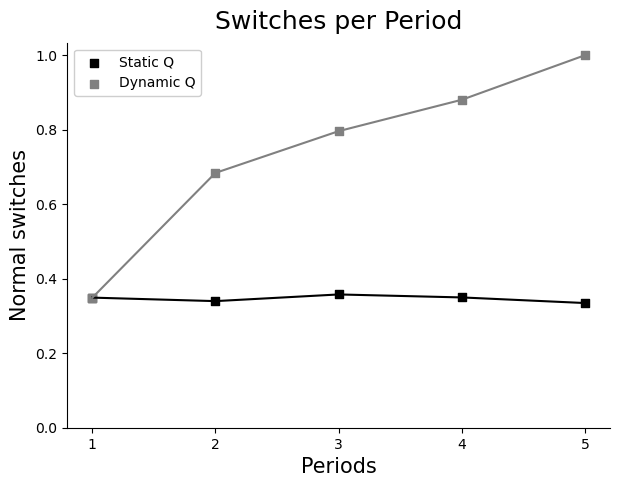

In [22]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(x_index, fixQ_normal_switch, c = "black", marker = "s", label='Static Q')
plt.plot(x_index, fixQ_normal_switch, c = "black")
plt.scatter(x_index, dycQ_normal_switch, c = "gray", marker = "s", label='Dynamic Q')
plt.plot(x_index, dycQ_normal_switch, c = "gray")

xa = [1,2,3,4,5]
plt.xticks(np.arange(0, 5), labels=xa)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Switches per Period', fontsize=18, pad=10)
plt.ylabel('Normal switches', fontsize=15)
plt.xlabel('Periods', fontsize=15)
plt.legend(loc=2, framealpha=.95)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [23]:
fixQ_p1 = []
fixQ_p2 = []
fixQ_p3 = []
fixQ_p4 = []
fixQ_p5 = []

dominance_period = 100

for a in range(5):
    switch_n = 0
    past_temperature = False

    for i in range(num_simulations):
        switches_sim = 0
        dict_name = 'data'+ str(i)
        TF_Temperature = d_staticQ[dict_name]['TFtemperature'][period_limits[a]:period_limits[a+1]].to_list()
        TF_Thirst = d_staticQ[dict_name]['TFthirst'][period_limits[a]:period_limits[a+1]].to_list()

        for j in range(len(TF_Temperature)-dominance_period):
            mean_10_temperature = 0
            mean_10_thirst = 0
            ten_temperature = 0
            ten_thirst = 0
            for k in range (dominance_period):
                ten_temperature += TF_Temperature[j+k]
                ten_thirst += TF_Thirst[j+k]
            mean_10_temperature = ten_temperature/10
            mean_10_thirst = ten_thirst/10

            if mean_10_temperature>mean_10_thirst and past_temperature == False:
                switches_sim+=1
                past_temperature = True
            if mean_10_temperature>mean_10_thirst and past_temperature == True:
                pass
            if mean_10_temperature<mean_10_thirst and past_temperature == True:
                switches_sim+=1
                past_temperature = False
            if mean_10_temperature<mean_10_thirst and past_temperature == False:
                pass
        
        if a == 0: fixQ_p1.append(switches_sim)
        if a == 1: fixQ_p2.append(switches_sim)
        if a == 2: fixQ_p3.append(switches_sim)
        if a == 3: fixQ_p4.append(switches_sim)
        if a == 4: fixQ_p5.append(switches_sim)

In [24]:
dycQ_p1 = []
dycQ_p2 = []
dycQ_p3 = []
dycQ_p4 = []
dycQ_p5 = []

dominance_period = 100

for a in range(5):
    switch_n = 0
    past_temperature = False

    for i in range(num_simulations):
        switches_sim = 0
        dict_name = 'data'+ str(i)
        TF_Temperature = d_dynamicQ[dict_name]['TFtemperature'][period_limits[a]:period_limits[a+1]].to_list()
        TF_Thirst = d_dynamicQ[dict_name]['TFthirst'][period_limits[a]:period_limits[a+1]].to_list()

        for j in range(len(TF_Temperature)-dominance_period):
            mean_10_temperature = 0
            mean_10_thirst = 0
            ten_temperature = 0
            ten_thirst = 0
            for k in range (dominance_period):
                ten_temperature += TF_Temperature[j+k]
                ten_thirst += TF_Thirst[j+k]
            mean_10_temperature = ten_temperature/10
            mean_10_thirst = ten_thirst/10

            if mean_10_temperature>mean_10_thirst and past_temperature == False:
                switches_sim+=1
                past_temperature = True
            if mean_10_temperature>mean_10_thirst and past_temperature == True:
                pass
            if mean_10_temperature<mean_10_thirst and past_temperature == True:
                switches_sim+=1
                past_temperature = False
            if mean_10_temperature<mean_10_thirst and past_temperature == False:
                pass
        
        if a == 0: dycQ_p1.append(switches_sim)
        if a == 1: dycQ_p2.append(switches_sim)
        if a == 2: dycQ_p3.append(switches_sim)
        if a == 3: dycQ_p4.append(switches_sim)
        if a == 4: dycQ_p5.append(switches_sim)

In [25]:
fixQ_meanswitches = [stt.mean(fixQ_p1), stt.mean(fixQ_p2), stt.mean(fixQ_p3), stt.mean(fixQ_p4), stt.mean(fixQ_p5)]
dycQ_meanswitches = [stt.mean(dycQ_p1), stt.mean(dycQ_p2), stt.mean(dycQ_p3), stt.mean(dycQ_p4), stt.mean(dycQ_p5)]
fixQ_varswitches = [stt.stdev(fixQ_p1), stt.stdev(fixQ_p2), stt.stdev(fixQ_p3), stt.stdev(fixQ_p4), stt.stdev(fixQ_p5)]
dycQ_varswitches = [stt.stdev(dycQ_p1), stt.stdev(dycQ_p2), stt.stdev(dycQ_p3), stt.stdev(dycQ_p4), stt.stdev(dycQ_p5)]

In [26]:
fixQ_normal_switches = [x / max(dycQ_meanswitches) for x in fixQ_meanswitches]
dycQ_normal_switches = [x / max(dycQ_meanswitches) for x in dycQ_meanswitches]

In [27]:
fixQ_normal_switches_var = [x / max(dycQ_meanswitches) for x in fixQ_varswitches]
dycQ_normal_switches_var = [x / max(dycQ_meanswitches) for x in dycQ_varswitches]

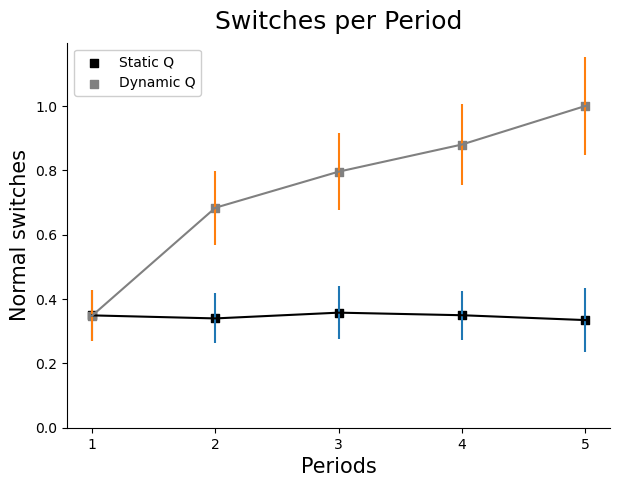

In [28]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(x_index, fixQ_normal_switches, c = "black", marker = "s", label='Static Q')
plt.plot(x_index, fixQ_normal_switches, c = "black")
plt.errorbar(x_index,fixQ_normal_switches,yerr=fixQ_normal_switches_var, linestyle="None")

plt.scatter(x_index, dycQ_normal_switches, c = "gray", marker = "s", label='Dynamic Q')
plt.plot(x_index, dycQ_normal_switches, c = "gray")
plt.errorbar(x_index,dycQ_normal_switches,yerr=dycQ_normal_switches_var, linestyle="None")

xa = [1,2,3,4,5]
plt.xticks(np.arange(0, 5), labels=xa)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Switches per Period', fontsize=18, pad=10)
plt.ylabel('Normal switches', fontsize=15)
plt.xlabel('Periods', fontsize=15)
plt.legend(loc=2, framealpha=.95)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()